In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

from skimage.measure import label, regionprops
import skimage.io as io
from skimage.transform import resize


Bad key savefig.frameon in file /cluster/home/oschmanf/.local/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.4.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file /cluster/home/oschmanf/.local/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.4.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file /cluster/home/oschmanf/.local/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout  # a log filename, sys.stdout or sys.stderr')
You pro

In [2]:
# Load data
h5_inputs = h5py.File('../bin/inputs.h5', 'r')
h5_results = h5py.File('../bin/results.h5', 'r')

In [3]:
frame = 5
cell_ix = 130

input_array = np.array(h5_inputs.get(list(h5_inputs.keys())[frame]))
result_array = np.array(h5_results.get(list(h5_results.keys())[frame]))

Text(0.5, 1.0, 'Daughter')

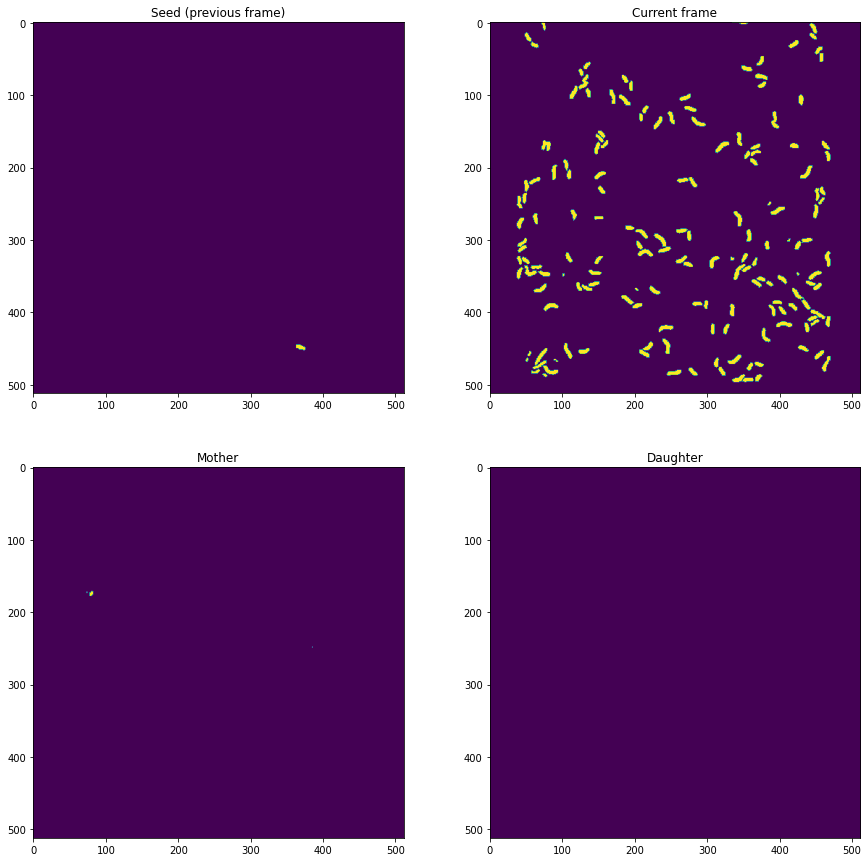

In [4]:
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.imshow(input_array[cell_ix,:,:,1])
plt.title('Seed (previous frame)')
plt.subplot(2,2,2)
plt.imshow(input_array[cell_ix,:,:,3])
plt.title('Current frame')
plt.subplot(2,2,3)
plt.imshow(result_array[cell_ix,:,:,0] > 0.7)
plt.title('Mother')
plt.subplot(2,2,4)
plt.imshow(result_array[cell_ix,:,:,1] > 0.7)
plt.title('Daughter')

In [5]:
label_stack = np.load('../bin/label_stack.npz')
label_stack = label_stack['label_stack']

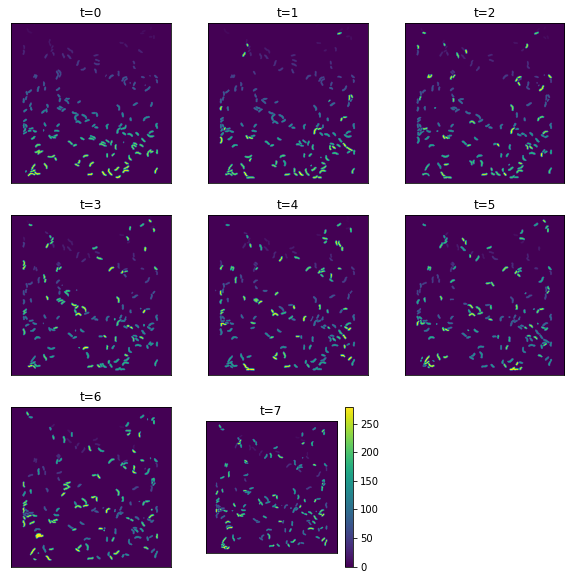

In [6]:
timeframes = np.arange(len(label_stack))
plt.figure(figsize = (10,10))
for i, l in enumerate(label_stack[::1]):
    plt.subplot(3,3,i+1)
    plt.imshow(l, vmin=label_stack.min())
    plt.title('t='+str(timeframes[::1][i]))
    plt.xticks([])
    plt.yticks([])
plt.colorbar()

In [7]:
num_time_steps = len(label_stack)

def compute_area(cell_id):
    areas = []
    for i in range(num_time_steps-2):
        regs_cell = regionprops((label_stack[i] == cell_id).astype(int))
        try:
            areas.append(regs_cell[0].area)
        except IndexError:
            areas.append(0)
    areas = np.array(areas)
    return areas

def compute_length(cell_id):
    lengths = []
    for i in range(num_time_steps-2):
        regs_cell = regionprops((label_stack[i] == cell_id).astype(int))
        try:
            lengths.append(regs_cell[0].major_axis_length)
        except IndexError:
            lengths.append(0)
    lengths = np.array(lengths)
    return lengths

In [12]:
# Compute features

area = compute_area(cell_id = 15)
length = compute_length(cell_id = 15)

Text(0.5, 0, 'Time frame')

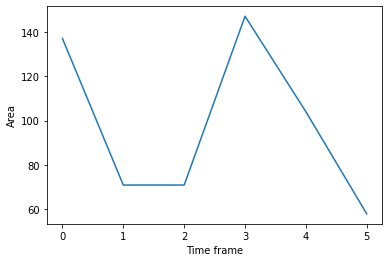

In [13]:
plt.plot(area)
plt.ylabel('Area')
plt.xlabel('Time frame')

Text(0.5, 0, 'Time frame')

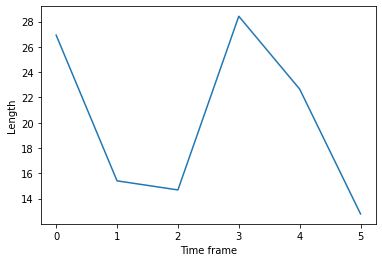

In [14]:
plt.plot(length)
plt.ylabel('Length')
plt.xlabel('Time frame')

In [11]:
label_stack.shape

(8, 512, 512)